In [236]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regionFrance import *
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

## Chiffre clé COVID 19

Import data

In [237]:
url_chiffre_cle = 'https://raw.githubusercontent.com/opencovid19-fr/data/master/dist/chiffres-cles.csv'

chiffre_france=pd.read_csv(url_chiffre_cle)
chiffre_france["date"] = pd.to_datetime(chiffre_france["date"])

chiffre_france.sort_values("date", inplace=True)
chiffre_france.tail()

,date,granularite,maille_code,maille_nom,cas_confirmes,deces,reanimation,hospitalises,gueris,source_nom,source_url,source_type
2420,2020-03-22,departement,DEP-38,Isère,117.0,2.0,NaN,NaN,NaN,ARS Auvergne-Rhône-Alpes,https://www.auvergne-rhone-alpes.ars.sante.fr/...,agences-regionales-sante
2419,2020-03-22,departement,DEP-37,Indre-et-Loire,64.0,0.0,NaN,NaN,NaN,ARS Centre-Val de Loire,https://www.centre-val-de-loire.ars.sante.fr/s...,agences-regionales-sante
2418,2020-03-22,departement,DEP-36,Indre,27.0,0.0,NaN,NaN,NaN,ARS Centre-Val de Loire,https://www.centre-val-de-loire.ars.sante.fr/s...,agences-regionales-sante
2416,2020-03-22,departement,DEP-28,Eure-et-Loir,58.0,2.0,NaN,NaN,NaN,ARS Centre-Val de Loire,https://www.centre-val-de-loire.ars.sante.fr/s...,agences-regionales-sante
2472,2020-03-22,monde,WORLD,Monde,318000.0,13664.0,NaN,NaN,94000.0,Ministère des Solidarités et de la Santé,https://www.dailymotion.com/video/x7svka4,ministere-sante


Filter on department only

In [238]:
chiffre_dep=chiffre_france[chiffre_france['maille_code'].str.contains('DEP')]

In [239]:
chiffre_dep[chiffre_dep['maille_code']=='DEP-75']

,date,granularite,maille_code,maille_nom,cas_confirmes,deces,reanimation,hospitalises,gueris,source_nom,source_url,source_type
486,2020-03-05,departement,DEP-75,Paris,17.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante
605,2020-03-06,departement,DEP-75,Paris,19.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante
719,2020-03-07,departement,DEP-75,Paris,21.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante
835,2020-03-08,departement,DEP-75,Paris,26.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante
936,2020-03-09,departement,DEP-75,Paris,27.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante
1052,2020-03-10,departement,DEP-75,Paris,44.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante
1191,2020-03-11,departement,DEP-75,Paris,80.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante
1335,2020-03-12,departement,DEP-75,Paris,126.0,NaN,NaN,NaN,NaN,ARS Ile-de-France,https://www.iledefrance.ars.sante.fr/system/fi...,agences-regionales-sante


In [240]:
cas_par_dep= chiffre_dep.groupby('maille_nom').sum().sort_values('cas_confirmes')
cas_par_dep=cas_par_dep.reset_index()
cas_par_dep

,maille_nom,cas_confirmes,deces,reanimation,hospitalises,gueris
0,Nièvre,4.0,0.0,0.0,0.0,0.0
1,La Réunion,10.0,0.0,0.0,0.0,0.0
2,Ariège,10.0,0.0,2.0,4.0,0.0
3,Ardennes,11.0,0.0,0.0,0.0,0.0
4,Yonne,19.0,7.0,0.0,0.0,0.0
5,Jura,19.0,6.0,0.0,0.0,0.0
6,Mayenne,20.0,0.0,0.0,0.0,0.0
7,Haute-Marne,21.0,0.0,0.0,0.0,0.0
8,Côte-d'Or,25.0,0.0,0.0,0.0,0.0
9,Haute-Saône,25.0,5.0,0.0,0.0,0.0


In [241]:
inv_map = {v: k for k, v in DEPARTMENTS.items()}

cas_par_dep['num_depart']=cas_par_dep['maille_nom'].map(inv_map)

cas_par_dep.at[36,'num_depart']=91
cas_par_dep.at[1,'num_depart']=65

dict_cas_depart = dict(zip(cas_par_dep['num_depart'].values.tolist(),cas_par_dep['cas_confirmes']))

## Map of cases in France

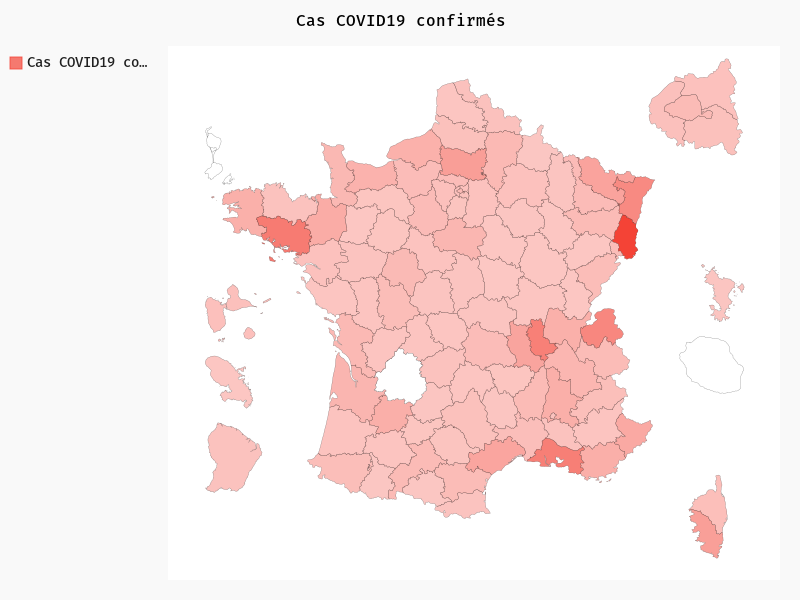

In [242]:
import pygal
fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Cas COVID19 confirmés'

fr_chart.add('Cas COVID19 confirmés', dict_cas_depart )

## Scatter plot method for map

In [243]:
# load a set of data
geo = pd.read_csv('Data/insee-map.csv', sep=';',
                 usecols=range(10),
                index_col='Code INSEE')
geo[['Latitude', 'Longitude']] = geo['geo_point_2d'].str.extract('(.+),(.+)', expand=True).astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,Latitude,Longitude
Code INSEE,,,,,,,,,,,
91645,91370,VERRIERES-LE-BUISSON,ESSONNE,ILE-DE-FRANCE,Commune simple,121.0,999.0,15.5,"48.75044312,2.25171297214",48.750443,2.251713
77133,77126,COURCELLES-EN-BASSEE,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,88.0,1082.0,0.2,"48.4125606521,3.05294050556",48.412561,3.052941
91378,91730,MAUCHAMPS,ESSONNE,ILE-DE-FRANCE,Commune simple,150.0,313.0,0.3,"48.5272680908,2.19718165044",48.527268,2.197182
77243,77400,LAGNY-SUR-MARNE,SEINE-ET-MARNE,ILE-DE-FRANCE,Chef-lieu canton,71.0,579.0,20.2,"48.8730701858,2.70978081313",48.873070,2.709781
77414,77160,SAINT-HILLIERS,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,158.0,1907.0,0.4,"48.6289146411,3.25823552684",48.628915,3.258236


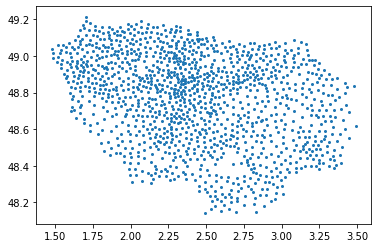

In [244]:
# scatter plot provides naive maps
plt.scatter(geo['Longitude'],
            geo['Latitude'],s=4)

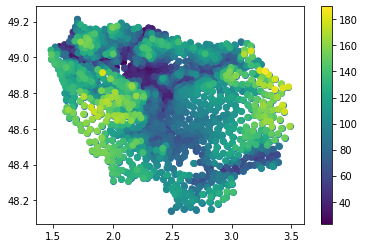

In [245]:
# Metropolitan France
metro = geo.loc[geo['Latitude'] > 40]
plt.scatter(metro['Longitude'],
            metro['Latitude'])

metro = metro.sort_values('Altitude Moyenne')
plt.scatter(metro['Longitude'],
            metro['Latitude'],
            c=metro['Altitude Moyenne'],
            cmap=plt.cm.viridis)
plt.colorbar()

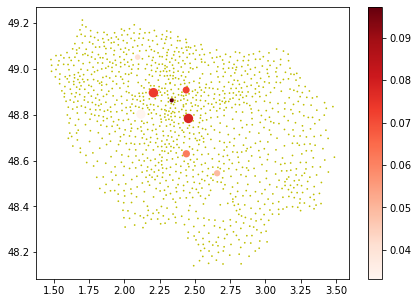

In [246]:
geo['Densité'] = geo['Population'] / geo['Superficie']

status = list(geo['Statut'].value_counts().index)

if pd.__version__ < '0.21.0':
    geo['Statut'] = geo['Statut'].astype('category', categories=status, ordered=True)
else:
    from pandas.api.types import CategoricalDtype
    cat_status = CategoricalDtype(categories=status, ordered=True)
    geo['Statut'] = geo['Statut'].astype(cat_status)

metro = geo.loc[geo['Latitude'] > 40]

# Noms des préfectures de région
plt.figure(figsize=(7, 5))
metro_A = metro.loc[metro["Statut"] >= "Préfecture"]
metro_A = metro_A.sort_values("Population", ascending=False)
metro_B = metro.loc[metro["Statut"] < "Préfecture"]

# communes
plt.scatter(metro_B["Longitude"],
            metro_B["Latitude"],
            c='y',
            s=3,
            edgecolors='none')

# préfectures
ax = plt.scatter(metro_A["Longitude"],
                metro_A["Latitude"],
                c=metro_A["Densité"],
                s=metro_A["Population"],
                cmap=plt.cm.Reds,
                edgecolors='none')

## noms des préfectures de région hors PLM
#metro_C = metro.loc[(metro["Statut"] >= "Préfecture de région") & ~metro["Commune"].str.contains("ARRONDISSEMENT")]
#for i, row in metro_C.iterrows():
#    plt.text(row["Longitude"],
#                 row["Latitude"],
#                 row["Commune"].title(),
#                 fontsize=8)
#    
plt.colorbar(ax);

## Folium

In [247]:
import folium

In [248]:
coords = (48.8398094,2.5840685)
map = folium.Map(location=coords, zoom_start=15)
map

In [277]:
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,Latitude,Longitude,Densité
Code INSEE,,,,,,,,,,,,
91645,91370,VERRIERES-LE-BUISSON,ESSONNE,ILE-DE-FRANCE,Commune simple,121.0,999.0,15.5,"48.75044312,2.25171297214",48.750443,2.251713,0.015516
77133,77126,COURCELLES-EN-BASSEE,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,88.0,1082.0,0.2,"48.4125606521,3.05294050556",48.412561,3.052941,0.000185
91378,91730,MAUCHAMPS,ESSONNE,ILE-DE-FRANCE,Commune simple,150.0,313.0,0.3,"48.5272680908,2.19718165044",48.527268,2.197182,0.000958
77243,77400,LAGNY-SUR-MARNE,SEINE-ET-MARNE,ILE-DE-FRANCE,Chef-lieu canton,71.0,579.0,20.2,"48.8730701858,2.70978081313",48.873070,2.709781,0.034888
77414,77160,SAINT-HILLIERS,SEINE-ET-MARNE,ILE-DE-FRANCE,Commune simple,158.0,1907.0,0.4,"48.6289146411,3.25823552684",48.628915,3.258236,0.000210


In [272]:
chiffre_dep.head()

,date,granularite,maille_code,maille_nom,cas_confirmes,deces,reanimation,hospitalises,gueris,source_nom,source_url,source_type
0,2020-01-24,departement,DEP-16,Charente,0.0,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante
12,2020-01-24,departement,DEP-87,Haute-Vienne,0.0,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante
11,2020-01-24,departement,DEP-86,Vienne,0.0,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante
9,2020-01-24,departement,DEP-64,Pyrénées-Atlantiques,0.0,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante
10,2020-01-24,departement,DEP-79,Deux-Sèvres,0.0,NaN,NaN,NaN,NaN,ARS Nouvelle-Aquitaine,https://www.nouvelle-aquitaine.ars.sante.fr/co...,agences-regionales-sante


In [273]:
STATIONS = ['ABBEVILLE']

LATS = [50.136]

LONGS = [1.834]

TEMPS = [7.6]

for i in range(len(STATIONS)):
    folium.CircleMarker(
        location = (LATS[i], LONGS[i]),
        radius = TEMPS[i]*2,
        color = 'crimson',
        fill = True,
        fill_color = 'crimson'
    ).add_to(map)

## Plotly map

In [301]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 10000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )
fig.show()

In [297]:
df.head()

,name,pop,lat,lon,text
0,New York,8287238,40.730599,-73.986581,New York <br>Population 8.287238 million
1,Los Angeles,3826423,34.053717,-118.242727,Los Angeles <br>Population 3.826423 million
2,Chicago,2705627,41.875555,-87.624421,Chicago <br>Population 2.705627 million
3,Houston,2129784,29.758938,-95.367697,Houston <br>Population 2.129784 million
4,Philadelphia,1539313,39.952335,-75.163789,Philadelphia <br>Population 1.539313 million


## Ratio des décès en France

In [6]:
deces = chiffre_france[chiffre_france["maille_nom"] == "France"][[
    "date", "cas_confirmes", "deces"
]]
deces.set_index("date", inplace=True)

deces["ratio"] = deces.deces / deces.cas_confirmes
deces

,cas_confirmes,deces,ratio
date,,,
2020-01-24,0.0,0.0,NaN
2020-01-25,3.0,0.0,0.000000
2020-01-26,3.0,0.0,0.000000
2020-01-27,3.0,0.0,0.000000
2020-01-29,4.0,0.0,0.000000
...,...,...,...
2020-03-19,10995.0,372.0,0.033834
2020-03-19,10995.0,372.0,0.033834
2020-03-20,12612.0,450.0,0.035680


In [9]:
deces.ratio.mean() * 100

2.884497133931705

La moyenne des pourcentage de décès par jour est à peu près de **1.75%.**

## Ratio de décès dans le monde

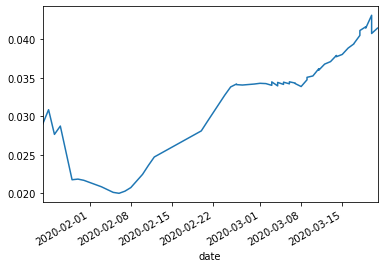

In [26]:
deces = chiffre_france[chiffre_france["maille_nom"] == "Monde"][["date", "cas_confirmes", "deces"]]
deces.set_index("date", inplace=True)

deces["ratio"] = deces.deces / deces.cas_confirmes
deces.ratio.plot()

In [25]:
deces

,cas_confirmes,deces,ratio
date,,,
2020-01-24,897.0,26.0,0.028986
2020-01-25,1329.0,41.0,0.030850
2020-01-26,2026.0,56.0,0.027641
2020-01-27,2820.0,81.0,0.028723
2020-01-29,6072.0,132.0,0.021739
2020-01-30,7790.0,170.0,0.021823
2020-01-31,9831.0,213.0,0.021666
2020-02-03,17383.0,362.0,0.020825
2020-02-05,24530.0,493.0,0.020098


## Patient analysis for death

In [19]:
patient_list = pd.read_csv("Data/COVID19_line_list_data.csv")
patient_list["death"].fillna("0", inplace=True)

In [20]:
def is_dead(x):
    if "Death" in str(x).split() or "death" in str(x).split():
        return 1
    return 0


patient_list["is_dead"] = patient_list["summary"].apply(is_dead)

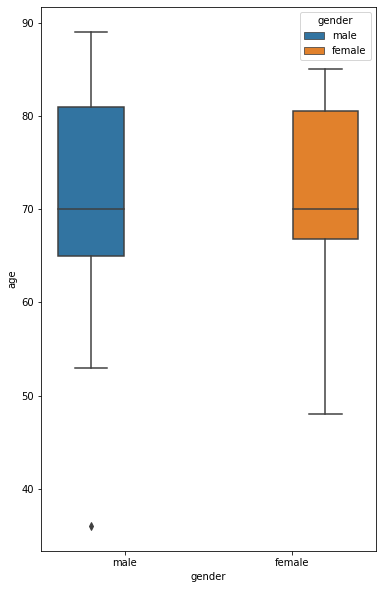

In [21]:
plt.figure(figsize=(6, 10))
sns.boxplot(x="gender",
            y="age",
            hue="gender",
            data=patient_list[patient_list["is_dead"] == 1])

# Recovered data

In [22]:
import pandas as pd
import io
import requests

url_confirmed="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
url_recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
url_deaths="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

confirmed = pd.read_csv(url_confirmed)
recovered = pd.read_csv(url_recovered)
deaths = pd.read_csv(url_deaths)

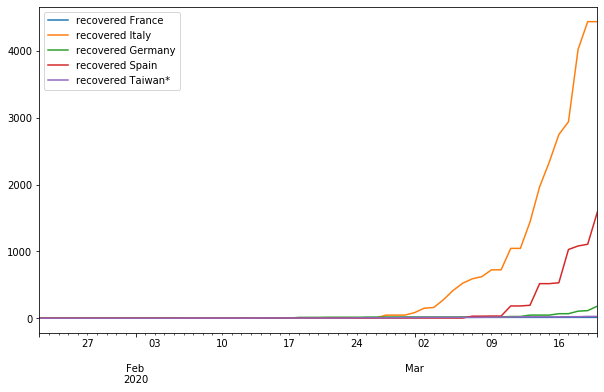

In [23]:
countries =['France','Italy','Germany','Spain','Taiwan*']

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for l in countries:
    r = recovered[recovered['Country/Region'] == l].iloc[0][4:]
    r.index=pd.to_datetime(r.index)
    r.name ='recovered '+l
    c = confirmed[confirmed['Country/Region'] == l].iloc[0][4:]
    c.index=pd.to_datetime(c.index)
    c.name ='confirmed '+l
    d = deaths[deaths['Country/Region'] == l].iloc[0][4:]
    d.index=pd.to_datetime(d.index)
    d.name='deaths '+l
    
    l_data = pd.DataFrame([r]).transpose()
    l_data.plot(ax=ax)